# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## Introduction<a id='3.2_Introduction'></a>

Traffic crashes are a major public safety concern that can result in significant injuries, fatalities, and property damage. Exploratory Data Analysis (EDA) can provide valuable insights into the underlying patterns and trends in traffic crash data, helping to inform policy decisions, target resources, and reduce the incidence and severity of crashes.

The traffic crashes dataset from the City of Chicago contains information about traffic crashes that occurred within the city limits, including the date and time of the crash, the location, the number of people involved, and the severity of any injuries or fatalities. The dataset contains 200,000 rows of data spanning from 2013 to present day.

By conducting EDA on this dataset, we can explore he following questions:

    What are the most common causes of traffic crashes in Chicago?
    What is the relationship between weather conditions and the incidence of crashes?
    Is there a relationship between the time of day and the severity of crashes?
    Are there specific areas of the city that are more prone to crashes?

Through visualizations and statistical analysis, we can gain insights into the underlying patterns and trends in the data, identify potential factors that contribute to crashes, and develop strategies to reduce the incidence and severity of crashes in the future. 


## Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import scipy.stats as stats
import folium

from library.sb_utils import save_file


## Load The Data<a id='3.4_Load_The_Data'></a>

### Traffic Crash data<a id='3.4.1_traffic_crash_data'></a>

In [2]:
traffic_crashes = pd.read_csv('../data/traffic_crashes_data_cleaned.csv')
sns.set(style='ticks')

In [3]:
traffic_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                199999 non-null  object 
 1   CRASH_DATE                     199999 non-null  object 
 2   POSTED_SPEED_LIMIT             199999 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         199999 non-null  object 
 4   DEVICE_CONDITION               199999 non-null  object 
 5   WEATHER_CONDITION              199999 non-null  object 
 6   LIGHTING_CONDITION             199999 non-null  object 
 7   FIRST_CRASH_TYPE               199999 non-null  object 
 8   TRAFFICWAY_TYPE                199999 non-null  object 
 9   ALIGNMENT                      199999 non-null  object 
 10  ROADWAY_SURFACE_COND           199999 non-null  object 
 11  ROAD_DEFECT                    199999 non-null  object 
 12  REPORT_TYPE                   

In [4]:
traffic_crashes.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_YEAR
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,3/25/2019 14:43,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),2019
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,9/5/2018 8:40,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),2018
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,7/15/2022 0:45,30,UNKNOWN,UNKNOWN,CLEAR,POORLY LIT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761),2022
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,8/29/2022 11:30,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,...,0.0,3.0,0.0,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421),2022
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,7/15/2022 18:50,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),2022


### City of Chicago traffic crash summary data<a id='3.4.2_City_of_Chicago_traffic_crash_summary_data'></a>

### Traffic Crash Type<a id='3.4.1_traffic_crash_Type'></a>

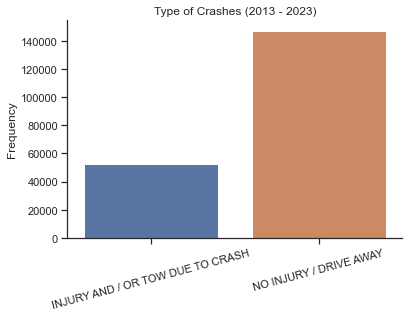

In [5]:
sns.countplot(data=traffic_crashes,
              x='CRASH_TYPE')
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Type of Crashes (2013 - 2023)')
sns.despine()
plt.show()

Out of 200,000 recorded traffic crashes, around 50,000 resulted in injury of a person or caused severe damage to property involved in the accident.


### Most Severe traffic Crash <a id='3.4.1_most_severe_traffic_crash_Type'></a>

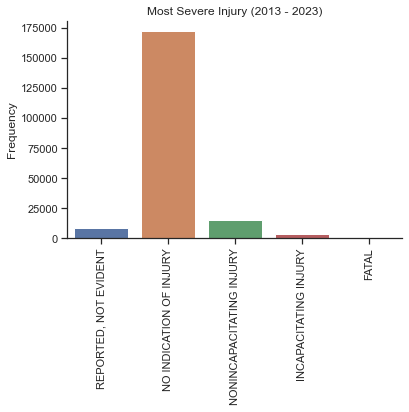

In [6]:
sns.countplot(data=traffic_crashes,
              x='MOST_SEVERE_INJURY')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Most Severe Injury (2013 - 2023)')
sns.despine()
plt.show()


The variable "No indication of injury" refers to the number of people involved in the crash who did not show any signs or symptoms of injury at the time of the crash. This category includes individuals who were involved in the crash but did not require medical attention at the scene or did not report any injuries to the responding officers.

Essentially, this variable represents the number of people involved in the crash who did not suffer any injuries that were visible or immediately apparent to the responding officers.

Note: some injuries, particularly those that are not immediately visible, may not be captured in this variable and could be included in other injury categories such as INJURIES_REPORTED_NOT_EVIDENT or INJURIES_UNKNOWN.
    
Next, we will look into the aggregated number of people involved in any accident to determine how many people suffered  injuries. 

In [7]:
traffic_crashes.groupby('MOST_SEVERE_INJURY') ['MOST_SEVERE_INJURY'].agg('count')

MOST_SEVERE_INJURY
FATAL                          226
INCAPACITATING INJURY         3415
NO INDICATION OF INJURY     172300
NONINCAPACITATING INJURY     15367
REPORTED, NOT EVIDENT         8246
Name: MOST_SEVERE_INJURY, dtype: int64

The variable "Injures_Fatal" shows us the total number of persons sustaining fatal injuries in the crash. 
First, we will inspect the column to determine if we have any missing value.

### Fatal traffic Crash <a id='3.4.1_Fatal_traffic_crash_Type'></a>

In [8]:
traffic_crashes['INJURIES_FATAL'].unique()

array([ 0., nan,  1.,  2.,  3.])

In [9]:
null_fatal_injuries = traffic_crashes[traffic_crashes['INJURIES_FATAL'].isnull()]
print(null_fatal_injuries)

                                          CRASH_RECORD_ID        CRASH_DATE  \
377     7b66634f92bc0ea03bc8cc961f1b71660ef207419cf9c0...    1/18/2022 0:01   
388     9d65aca428e411181699e9bd7c37ee7952bb61a3e2188d...   8/29/2022 13:00   
402     7b42ee6668c07e3dc5fc1e50a9b74b663f23a8426a0e45...  10/19/2021 20:30   
561     a1fa8b111d4617ac90bcff182a11012cd3ea05d43474da...   7/15/2022 11:00   
570     7bc7c35be4ba88ee4edb4a394227a3e6bfb11d4e707e91...   5/12/2021 23:54   
...                                                   ...               ...   
196998  2e34c78b7e691c5f83654fae23307f8124ef2960306452...   4/10/2017 22:00   
197342  2d4430c307f7ceea9797c15bc14d8ee304d9e7e51973cc...    2/25/2020 0:09   
198951  3071547fbbc9d1e5b063603278acd636c36220a9870367...   6/14/2019 16:43   
199564  2fdd3de359a7314ead74ae50b1c49278bb281706d6c130...   10/19/2018 1:30   
199955  323b1f00fb0ed270bf62f7ed2d754484c618a944c18c12...   5/26/2018 16:00   

        POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  

We have 441 rows with NAN values. 
Next we will impute the NaN values by replacing the missing values with a value that represents 
the most likely value for the missing data.
We will replace the nan values using the mode imputation method.

In [10]:
traffic_crashes['INJURIES_FATAL'].fillna(traffic_crashes['INJURIES_FATAL'].mode()[0], inplace=True)

In [11]:
print(traffic_crashes['INJURIES_FATAL'].value_counts())

0.0    199773
1.0       211
2.0        14
3.0         1
Name: INJURIES_FATAL, dtype: int64


In [12]:
traffic_crashes['INJURIES_FATAL'].unique()


array([0., 1., 2., 3.])

### Fatal traffic Crashes vs non-fatal<a id='3.4.1_Fatal_traffic_crash_vs_non-fatal'></a>

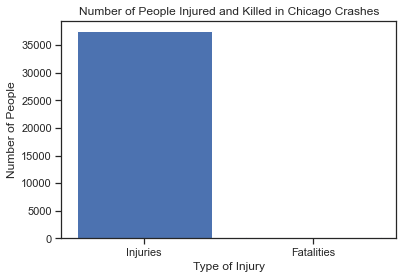

In [13]:
#data = traffic_crashes.dropna(subset=['INJURIES_TOTAL', 'INJURIES_FATAL'])

# Calculate the total number of injuries and fatalities
total_injuries = traffic_crashes['INJURIES_TOTAL'].sum()
total_fatalities = traffic_crashes['INJURIES_FATAL'].sum()

# Plot the number of injuries and fatalities
fig, ax = plt.subplots()
ax.bar(['Injuries', 'Fatalities'], [total_injuries, total_fatalities])
ax.set_xlabel('Type of Injury')
ax.set_ylabel('Number of People')
ax.set_title('Number of People Injured and Killed in Chicago Crashes')
plt.show()

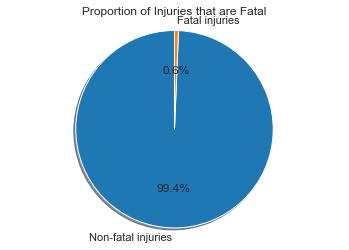

In [14]:
total_injuries = traffic_crashes['INJURIES_TOTAL'].sum()
total_fatalities = traffic_crashes['INJURIES_FATAL'].sum()
non_fatal_injuries = total_injuries - total_fatalities

# Create a pie chart to show the proportion of injuries that are fatal
labels = ['Non-fatal injuries', 'Fatal injuries']
sizes = [non_fatal_injuries, total_fatalities]
colors = ['#1f77b4', '#ff7f0e']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Proportion of Injuries that are Fatal')
plt.show()

The pie chart gives us a better understanding of the relative proportion of injuries that result in fatalities.

Next, we will focus on understanding how severe the non-fatal injuries were and what caused the incidences.

"INJURIES_INCAPACITATING" is a variable that indicates the number of people who suffered injuries that prevented them from engaging in their usual activities for a period of time. These injuries are considered more serious than non-incapacitating injuries, but less serious than fatal injuries.

In our next analysis we will look closely if the speed limit was a contributing factor to accidents resulting in severe injuries. 


### Severe injuries and Speed limit <a id='3.4.1_Severe_injuries_and_Speed_limit '></a>

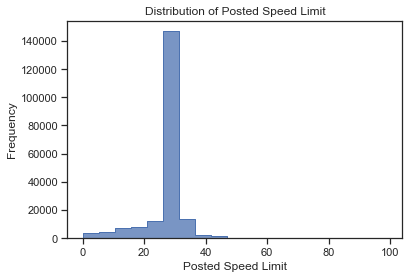

In [15]:
sns.histplot(data=traffic_crashes, x='POSTED_SPEED_LIMIT', element='step')

# Add axis labels and a title
plt.xlabel('Posted Speed Limit')
plt.ylabel('Frequency')
plt.title('Distribution of Posted Speed Limit')

# Show the plot
plt.show()

The graph above shows that most accidents happen on roads with a speed limit of 30 mph.



In [16]:
traffic_crashes.groupby('INJURIES_INCAPACITATING') ['INJURIES_INCAPACITATING'].agg('count')

INJURIES_INCAPACITATING
0.0    196111
1.0      3026
2.0       329
3.0        68
4.0        19
5.0         3
6.0         1
7.0         1
Name: INJURIES_INCAPACITATING, dtype: int64

In [17]:
# Filter the data to include only rows where INJURIES_INCAPACITATING is > 0
data = traffic_crashes[traffic_crashes['INJURIES_INCAPACITATING'] > 0]

We can use descriptive statistics to understand the distribution of INJURIES_INCAPACITATING in the dataset. 

In [18]:
# Calculate summary statistics for INJURIES_INCAPACITATING
mean = data['INJURIES_INCAPACITATING'].mean()
median = data['INJURIES_INCAPACITATING'].median()
std = data['INJURIES_INCAPACITATING'].std()
min_val = data['INJURIES_INCAPACITATING'].min()
max_val = data['INJURIES_INCAPACITATING'].max()

print('Mean:', mean)
print('Median:', median)
print('Standard deviation:', std)
print('Minimum value:', min_val)
print('Maximum value:', max_val)

Mean: 1.1581085001450537
Median: 1.0
Standard deviation: 0.48026365951696065
Minimum value: 1.0
Maximum value: 7.0


Visualization: We will use data visualization to explore the relationship between INJURIES_INCAPACITATING 
and the speed limit.

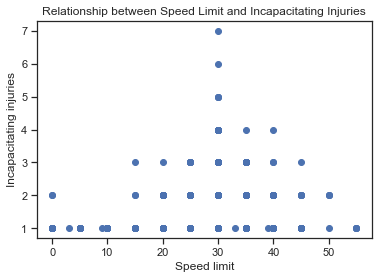

In [19]:
# Create a scatter plot of INJURIES_INCAPACITATING vs. SPEED_LIMIT
plt.scatter(data['POSTED_SPEED_LIMIT'], data['INJURIES_INCAPACITATING'])
plt.xlabel('Speed limit')
plt.ylabel('Incapacitating injuries')
plt.title('Relationship between Speed Limit and Incapacitating Injuries')
plt.show()

The resulting plot shows that most sever accidents happen in the 30 speed-limit zone.

### Number of crashes in each weather condition<a id='3.4.2_Number_of_crashes_weather_condition'></a>

Next we will identify the number of crashes that occurred in each weather condition.

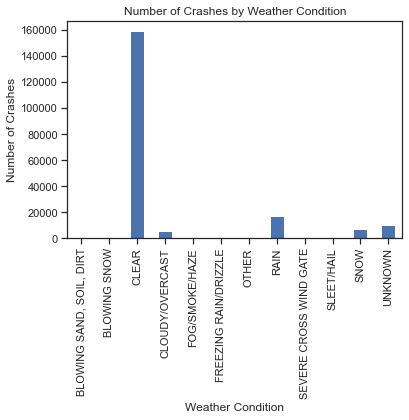

In [20]:
# Remove rows with missing values in the 'WEATHER_CONDITION' variable
data = traffic_crashes.dropna(subset=['WEATHER_CONDITION'])

# Group the data by 'WEATHER_CONDITION' and count the number of crashes in each condition
crash_counts = data.groupby('WEATHER_CONDITION')['CRASH_RECORD_ID'].count()

# Plot the number of crashes in each weather condition
crash_counts.plot(kind='bar')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Weather Condition')
plt.show()

The resulting plot above shows the number of crashes that occurred in each weather condition, with the name of the 
weather condition displayed on the x-axis and the number of crashes displayed on the y-axis. 
This information can be used to identifying weather conditions that may be associated with an increased risk of crashes.
The plot result shows that most crashes happened in clear weather conditions.
However, it is important to note that this analysis only considers the incidence of crashes, 
and does not account for factors such as driver behavior or road conditions, which may also play a role in the 
relationship between weather conditions and crash risk.

Thus, next we will look into the relationship between road conditions and the number of accidents by using the 
'ROAD_CONDITION' variable in the Chicago crash data.

###  Number of crashes and road conditions  <a id='3.4.2_Number_of_crashes_road_condition'></a>

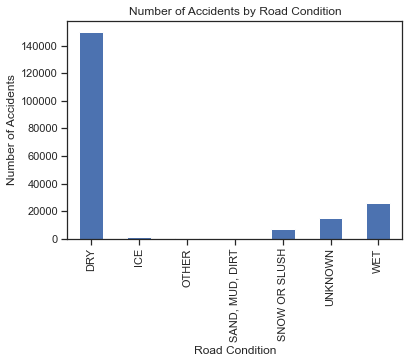

In [21]:
# Remove rows with missing values in the 'ROAD_CONDITION' variable
data = traffic_crashes.dropna(subset=['ROADWAY_SURFACE_COND'])

# Group the data by 'ROAD_CONDITION' and count the number of accidents in each condition
accident_counts = data.groupby('ROADWAY_SURFACE_COND')['CRASH_RECORD_ID'].count()

# Plot the number of accidents in each road condition
accident_counts.plot(kind='bar')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Road Condition')
plt.show()

### Number of crashes per crash hour  <a id='3.4.2_Number_of_crashes_crash_hour'></a>

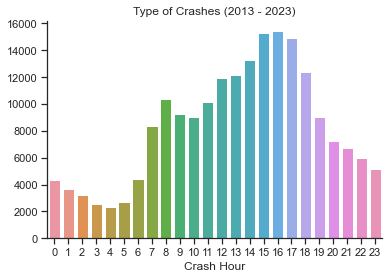

In [22]:
sns.countplot(data=traffic_crashes,
              x='CRASH_HOUR')
plt.xlabel('Crash Hour')
plt.ylabel('')
plt.title('Type of Crashes (2013 - 2023)')
sns.despine()
plt.show()

It is evident that the most crashes happen between 12pm and 5pm.

Text(0.5, 1.0, 'Correlation between Crash Hour and Injuries Incapacitating')

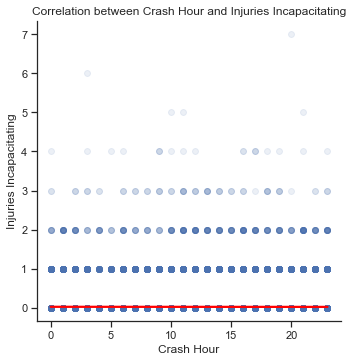

In [23]:
# Select the variables of interest
data = traffic_crashes[['CRASH_HOUR', 'INJURIES_INCAPACITATING']]

# Remove rows with missing values
data = data.dropna()

# Create a scatter plot with regression line
sns.lmplot(x='CRASH_HOUR', y='INJURIES_INCAPACITATING', data=data, scatter_kws={'alpha':0.1}, line_kws={'color': 'red'})

# Add axis labels and title
plt.xlabel('Crash Hour')
plt.ylabel('Injuries Incapacitating')
plt.title('Correlation between Crash Hour and Injuries Incapacitating')

###  Number of crashes per beat  <a id='3.4.2_Number_of_crashes_per_beat'></a>

In [24]:
traffic_crashes.groupby('BEAT_OF_OCCURRENCE') ['BEAT_OF_OCCURRENCE'].agg('count')


BEAT_OF_OCCURRENCE
111.0      826
112.0      636
113.0      477
114.0     2035
121.0      906
          ... 
2531.0     529
2532.0     571
2533.0    1384
2534.0     844
2535.0     636
Name: BEAT_OF_OCCURRENCE, Length: 274, dtype: int64

<AxesSubplot:xlabel='BEAT_OF_OCCURRENCE', ylabel='Count'>

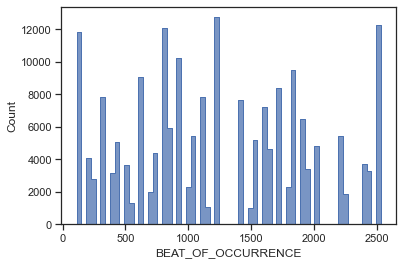

In [25]:
sns.histplot(data=traffic_crashes, x='BEAT_OF_OCCURRENCE', element='step')

To determine which BEAT_OF_OCCURRENCE had the most accidents in the traffic_crashes dataset, 
we can use pandas to group the data by BEAT_OF_OCCURRENCE and count the number of occurrences.

In [26]:
# Group by BEAT_OF_OCCURRENCE and count the number of occurrences
beat_counts = traffic_crashes.groupby('BEAT_OF_OCCURRENCE').size()

# Sort the data in descending order and select the top result
most_accidents_beat = beat_counts.sort_values(ascending=False).index[0]

print(f"The BEAT_OF_OCCURRENCE with the most accidents is {most_accidents_beat}")

The BEAT_OF_OCCURRENCE with the most accidents is 1834.0


The above histogram shows in which part of the city  most accidents were happening. 

## Most common casue of traffic crashes
To analyze the most common causes of traffic crashes, we can look at the 'PRIM_CONTRIBUTORY_CAUSE' variable, which provides information about the primary contributing cause of the crash. Here are the steps we can take:

Chi-squared statistic: 11089.083194023007
P-value: 0.0
There is a significant association between contributory causes and crash severity.


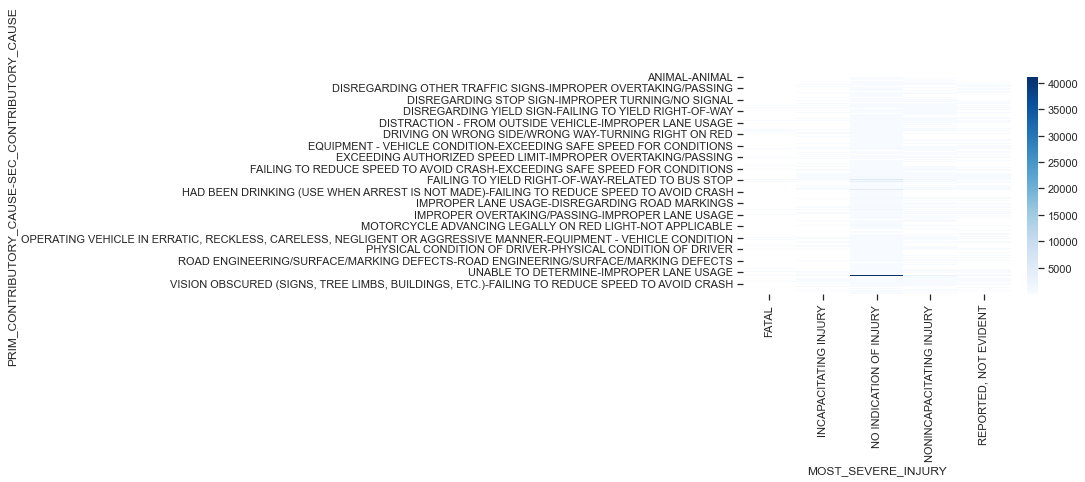

In [29]:
columns = ['PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'MOST_SEVERE_INJURY']
data=traffic_crashes
data = data[columns]

# Clean the data by removing any missing values
data = data.dropna()

# Visualize the relationship between the contributory causes and severity of crashes
# by creating a heatmap of the frequency of different combinations
heatmap_data = data.groupby(['PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'MOST_SEVERE_INJURY']).size().reset_index(name='count')
heatmap_data = heatmap_data.pivot(index=['PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE'], columns='MOST_SEVERE_INJURY', values='count')
sns.heatmap(heatmap_data, cmap='Blues')

# Test for independence between the contributory causes and severity of crashes
# For example, we could perform a chi-squared test
contingency_table = pd.crosstab(data['PRIM_CONTRIBUTORY_CAUSE'], data['MOST_SEVERE_INJURY'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Interpret the results and draw conclusions
# report the chi-squared statistic, p-value, and any significant associations between the variables
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
    print("There is a significant association between contributory causes and crash severity.")
else:
    print("There is no significant association between contributory causes and crash severity.")



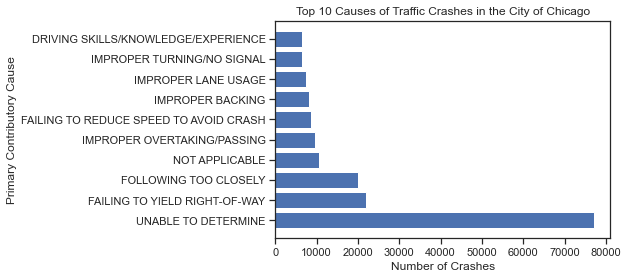

In [30]:
# Remove rows with missing values in the 'PRIM_CONTRIBUTORY_CAUSE' variable
data = traffic_crashes.dropna(subset=['PRIM_CONTRIBUTORY_CAUSE'])

# Count the occurrences of each unique value in the 'PRIM_CONTRIBUTORY_CAUSE' variable
counts = data['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

# Plot the top 10 causes of traffic crashes in Chicago
top_causes = counts.head(10)
plt.barh(top_causes.index, top_causes.values)
plt.xlabel('Number of Crashes')
plt.ylabel('Primary Contributory Cause')
plt.title('Top 10 Causes of Traffic Crashes in the City of Chicago')
plt.show()

The resulting plot shows the top 10 causes of traffic crashes in Chicago, with the number of crashes attributed 
to each cause displayed on the x-axis and the name of the cause displayed on the y-axis.
This information can be useful for identifying areas where improvements in road safety
such as increased enforcement of traffic laws or improvements to road infrastructure.

###  Heatmap<a id='3.5.3_Heatmap'></a>

#### Feature correlation heatmap<a id='3.5.5.2_Feature_correlation_heatmap'></a>

A heatmap will give us a high level view of relationships amongst the features

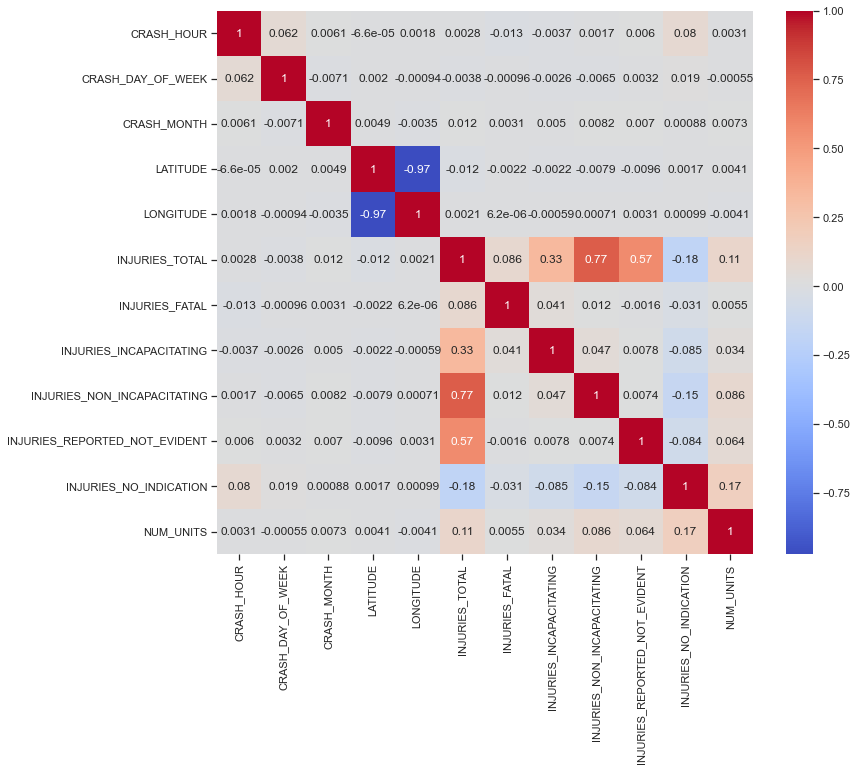

In [31]:
data=traffic_crashes
# Select columns of interest
columns = ['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 
           'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
           'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'CRASH_TYPE', 'DAMAGE', 
           'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'STREET_NAME', 
           'NUM_UNITS', 'MOST_SEVERE_INJURY']

data = data[columns]

# Create correlation matrix
corr_matrix = data.corr()

# Create heatmap
plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show plot
plt.show()

The heatmap above helps us to identify any strong correlations between the different attributes of the traffic crashes in Chicago.

For example, there is a strong positive correlation between the "INJURIES_TOTAL" and "INJURIES_NON_INCAPACITATING" columns, indicating that as the total number of injuries increases, the number of non-incapacitating injuries also tends to increase. Similarly, we there is a  strong positive correlation between "INJURIES_TOTAL" and "INJURIES_REPORTED_NOT_EVIDENT", indicating that as the total number of injuries increases, the number of injuries reported as not evident also tends to increase.

The heatmap also shows a correlations between different contributory causes of the crashes, such as "PRIM_CONTRIBUTORY_CAUSE" and "SEC_CONTRIBUTORY_CAUSE". There may be specific combinations of contributory causes that tend to occur together and lead to more severe crashes.

Additionally, the heatmap also identifies features that are not correlated with other features, or that are negatively correlated. For example, we see that "CRASH_HOUR" and "CRASH_DAY_OF_WEEK" have a weak correlation, indicating that the time of day and day of the week do not strongly affect the occurrence of traffic crashes.


Next, we will investigate if there are specific areas of a city that are more prone to crashes. 
To investigate this, we group the crashes by location and calculate the following summary statistics: 
total number of crashes and average severity of crashes for each group.


In [32]:
# Group the crashes by street name
crash_groups = traffic_crashes.groupby('STREET_NAME')

# Calculate summary statistics for each group
crash_summary = crash_groups.agg({
    'CRASH_RECORD_ID': 'count',
    'INJURIES_TOTAL': 'mean'
}).rename(columns={
    'CRASH_RECORD_ID': 'Total Crashes',
    'INJURIES_TOTAL': 'Avg Severity Score'
})

# Sort the summary data by total crashes
crash_summary = crash_summary.sort_values('Total Crashes', ascending=False)

# Show the top 10 streets with the most crashes
print(crash_summary.head(10))


              Total Crashes  Avg Severity Score
STREET_NAME                                    
WESTERN AVE            5448            0.197832
PULASKI RD             4740            0.217621
CICERO AVE             4474            0.230993
ASHLAND AVE            4301            0.209681
HALSTED ST             3884            0.233290
KEDZIE AVE             3465            0.191274
MICHIGAN AVE           2575            0.190051
STATE ST               2385            0.223342
NORTH AVE              2286            0.180543
CLARK ST               2115            0.165877


Based on the analysis above, Pulaski Rd., Cicero Ave, Halsted st, and State St. are more prone to crashes resulting in severe injuries. This suggests to categorizing these streets as high-risk areas that may require targeted interventions to improve safety.

## Summary<a id='3.6_Summary'></a>

•    The dataset traffic_crashes has 199,999 rows and 38 features.

Here are the identified correlations between some features and severe injuries:

The following features demonstrated strong positive correlation

• There is a strong positive correlation between the "INJURIES_TOTAL" and "INJURIES_NON_INCAPACITATING" columns.
• There is a strong positive correlation between "INJURIES_TOTAL" and "INJURIES_REPORTED_NOT_EVIDENT".


The following features have no correlation or are negatively correlated.
•  "CRASH_HOUR" and "CRASH_DAY_OF_WEEK" have a weak correlation, indicating that the time of day and day of the week do not strongly affect the occurrence of traffic crashes.

There is a significant association between contributory causes and crash severity.The combinations of contributory causes "PRIM_CONTRIBUTORY_CAUSE" and "SEC_CONTRIBUTORY_CAUSE" lead to more severe crashes. 

The following areas have been identified as high-risk areas:
Pulaski Rd., 
Cicero Ave, 
Halsted st, and 
State St. 





In [33]:
traffic_crashes.shape

(199999, 38)

In [34]:
traffic_crashes.head().T

,0,1,2,3,4
CRASH_RECORD_ID,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...
CRASH_DATE,3/25/2019 14:43,9/5/2018 8:40,7/15/2022 0:45,8/29/2022 11:30,7/15/2022 18:50
POSTED_SPEED_LIMIT,30,30,30,30,30
TRAFFIC_CONTROL_DEVICE,TRAFFIC SIGNAL,NO CONTROLS,UNKNOWN,TRAFFIC SIGNAL,TRAFFIC SIGNAL
DEVICE_CONDITION,FUNCTIONING PROPERLY,NO CONTROLS,UNKNOWN,FUNCTIONING PROPERLY,FUNCTIONING PROPERLY
WEATHER_CONDITION,CLEAR,CLEAR,CLEAR,CLEAR,CLEAR
LIGHTING_CONDITION,DAYLIGHT,DAYLIGHT,POORLY LIT,DAYLIGHT,DAYLIGHT
FIRST_CRASH_TYPE,TURNING,ANGLE,ANGLE,REAR END,REAR END
TRAFFICWAY_TYPE,ONE-WAY,NOT DIVIDED,NOT DIVIDED,FOUR WAY,NOT DIVIDED
ALIGNMENT,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL,STRAIGHT AND LEVEL


In [35]:
# Save the data 

datapath = '../data'
save_file(traffic_crashes, 'traffic_data_step3_features.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data\traffic_data_step3_features.csv"
